In [1]:
# Numpy
import numpy as np
# Pandas
import pandas as pd
# Plotnine (ggplot for Python)
from plotnine import *
%load_ext autoreload
%autoreload 2

rng = np.random.default_rng(seed = 0)

# Multiple output plot with simulation and points

This demo shows how to plot simulations and data points for multiple outputs and doses 

## Load simulation results and data

In [2]:
results = pd.read_csv("results.csv")
Tdat = pd.read_csv("Tdat.csv")
display(results)
display(Tdat)

,subject,dose_label_mg,t_days,output,value
0,s001,12.0,0.00,drug_nM,0.000000
1,s001,12.0,0.00,payload_nM,0.000000
2,s001,12.0,0.02,drug_nM,0.826394
3,s001,12.0,0.02,payload_nM,0.000098
4,s001,12.0,0.04,drug_nM,1.642598
...,...,...,...,...,...
2623,s003,10.0,8.70,payload_nM,0.031250
2624,s003,10.0,8.72,drug_nM,0.222310
2625,s003,10.0,8.72,payload_nM,0.031070
2626,s003,10.0,8.74,drug_nM,0.219569


,time_h,subject,output,dose_label_mg,value
0,2.0,s001,drug_nM,12.0,4.551538
1,3.0,s001,drug_nM,12.0,4.017570
2,6.0,s001,drug_nM,12.0,3.963476
3,10.0,s001,drug_nM,12.0,3.600911
4,14.0,s001,drug_nM,12.0,2.681371
...,...,...,...,...,...
87,106.0,s003,payload_nM,10.0,0.105237
88,110.0,s003,payload_nM,10.0,0.119249
89,114.0,s003,payload_nM,10.0,0.115283
90,144.0,s003,payload_nM,10.0,0.100977


## Plot

/opt/pixi/cache/envs/abm-platform-training-11393412784987863449/envs/default/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/opt/pixi/cache/envs/abm-platform-training-11393412784987863449/envs/default/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
/opt/pixi/cache/envs/abm-platform-training-11393412784987863449/envs/default/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 3 rows containing missing values.


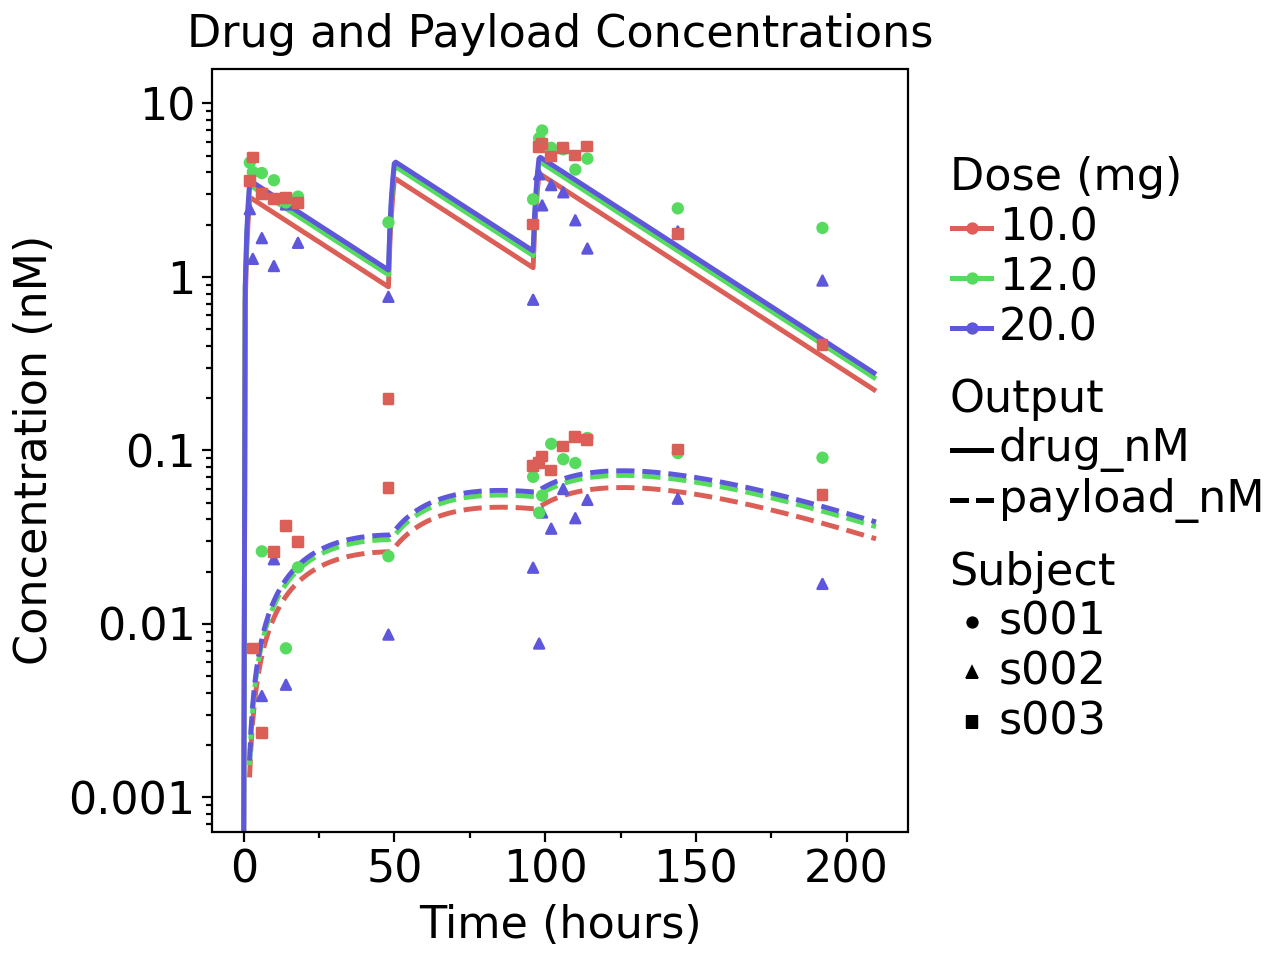

In [3]:
# Make sure dose_label_mg is categorical
# generate time in hours
Tdat["dose_label_mg"] = pd.Categorical(Tdat["dose_label_mg"])
results["t_h"] = results.t_days * 24
results["dose_label_mg"] = pd.Categorical(results["dose_label_mg"])

(ggplot(results, aes(x='t_h', y='value',color='dose_label_mg',linetype='output'))
    + geom_line(size=1)
      + scale_y_log10(limits=(1E-3,1E1))
     +xlim(0,210)
    + labs(title='Drug and Payload Concentrations',
           x='Time (hours)',
           y='Concentration (nM)',
           color = 'Dose (mg)',
           linetype = "Output")
+ theme_matplotlib()
+theme(text=element_text(size=16))
    + geom_point(
         data=Tdat,
        mapping=aes(x='time_h',y='value',color='dose_label_mg',shape='subject')
    ) 
    + labs(shape="Subject")
)